In [7]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
reviews = pd.read_csv("Data/classifier_data.csv")
reviews.dropna(inplace=True)

,Review,Real
0,Best bbq never have a chicken wing make that s...,0
1,I love this place The well filet on the planet...,0
2,This place have the well gelato One of the wel...,0
3,Great spot for sushi at a dinner place They ha...,0
4,Small plate good food friendly staff who keep ...,0
...,...,...
130225,Good hamburger just a little bite expensive bu...,1
130226,Great home feel Authentic Mexican food Huge bu...,1
130227,Poor flavor long wait time and decorate to giv...,1
130228,Love the AYCE sushi at the place every time I ...,1


In [3]:
train, test = train_test_split(reviews, test_size=0.30)
train.Real.value_counts()

1    45599
0    45353
Name: Real, dtype: int64

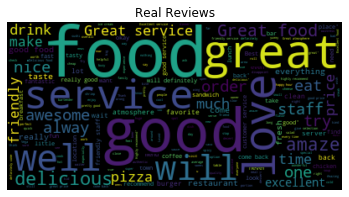

In [26]:
stopwords = set(STOPWORDS)
stopwords.add("place")
stopwords.add("go")

wordcloud = WordCloud(stopwords=stopwords).generate("".join(str(list(reviews[reviews["Real"] == 1].Review.values))))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Real Reviews")
plt.show()

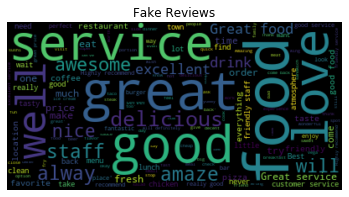

In [27]:
wordcloud = WordCloud(stopwords=stopwords).generate("".join(str(list(reviews[reviews["Real"] == 0].Review.values))))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Fake Reviews")
plt.show()

In [182]:
"""
Testing clustering
"""
vectorized_text = TfidfVectorizer(stop_words='english')
vec_reviews = vectorized_text.fit_transform(reviews['Review'].values)

In [190]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7).fit(vec_reviews)

In [191]:
kmeans_prediction_3 = model.predict(vec_reviews)

array([0, 6, 0, ..., 0, 0, 2], dtype=int32)

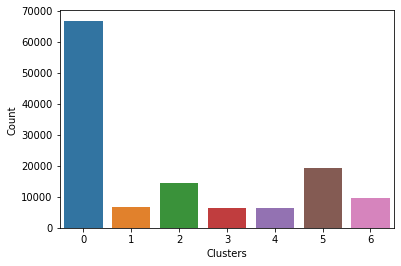

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
cp = sns.countplot(kmeans_prediction_3)
cp.set(xlabel='Clusters', ylabel='Count')
plt.show()

In [195]:
#source: https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py
def get_topn_features(n,no_of_cluster,model):
    ordered_centroids = model.cluster_centers_.argsort()[:,::-1]
    feature_names = vectorized_text.get_feature_names()
    for i in range(no_of_cluster):
        print("Cluster %d:" % i, end='')
        for indexes in ordered_centroids[i,:n]:
            print(' %s' % feature_names[indexes], end='')
        print()

get_topn_features(10,7,model)

Cluster 0: place food love service delicious great time like come just
Cluster 1: amaze food place service great love good definitely recommend delicious
Cluster 2: great food service place atmosphere love price delicious time good
Cluster 3: excellent service food great good place price recommend delicious definitely
Cluster 4: awesome great food service place love good atmosphere definitely amaze
Cluster 5: good food service place really price great nice pretty love
Cluster 6: friendly staff food great service good place super delicious love


In [18]:
"""
All clusters look same, the sentiment are majority positive.
vader to check sentiment
https://github.com/cjhutto/vaderSentiment
"""
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/davidnyberg/nltk_data...


True

In [60]:
sid = SentimentIntensityAnalyzer()
sid.

(reviews[reviews["Real"] == 1].Review.values[535])

{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'compound': -0.6818}

In [77]:
real_reviews = reviews[reviews["Real"] == 1].Review.values
fake_reviews = reviews[reviews["Real"] == 0].Review.values

pos_fake, pos_real, neg_fake ,neg_real = 0, 0, 0, 0

for r, f in zip(real_reviews, fake_reviews):
    real_senti = sid.polarity_scores(r)
    fake_senti = sid.polarity_scores(f)
    pos_real += real_senti.get('pos')
    pos_fake += fake_senti.get('pos')
    
    neg_real += real_senti.get('neg')
    pos_real += fake_senti.get('neg')
    

In [89]:
print("Average positivate real score: ",pos_real / len(real_reviews))
print("Average negative real score: ",neg_real / len(real_reviews))
print("Average positivate fake score: ",pos_fake / len(real_reviews))
print("Average negative fake score: ",neg_fake / len(real_reviews))

Average positivate real score:  0.3559294587945873
Average negative real score:  0.040805904059040506
Average positivate fake score:  0.30850415129151154
Average negative fake score:  0.0
